<a href="https://colab.research.google.com/github/JoungMinJu/machine_learning/blob/main/7%EC%9E%A5/%EC%8B%A0%EA%B2%BD%EB%A7%9D%EB%AA%A8%EB%8D%B8%EA%B3%BC%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

일반적으로 사이킷런에서 제공하는 머신러닝은 좋은 성능 내기위해 매개변수 조정하고 훈련하는 과정을 반복했는데 이런 알고리즘들은 모델의 구조가 어느정도 고정이 되어있는 것 같은 ㅡㄴ낌

근데 딥러닝은 모델의 구조를 직접 만든다는 느낌이 강하다.

In [ ]:
#손실곡선
#케라스의 fit()메서드는 History 클래스 객체를 반환한다. History객체에서는 훈련과정에서 계산한 지표 즉, 손실과 정확도 값이 저장되어있다.



In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target)=keras.datasets.fashion_mnist.load_data()
train_scaled=train_input/255.0
train_scaled,val_scaled,train_target, val_target=train_test_split(train_scaled,train_target, test_size=0.2, random_state=42)


In [8]:
#모델 만드는 함수 정의
def model_fn(a_layer=None):
  model=keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10,activation='softmax'))
  return model

In [9]:
model=model_fn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [10]:
#모델을 훈련하지만 fit()메서드의 결과를 history 변수에 담을 것

model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=5, verbose=0)

#verbose는 ,매개변수 훈련과정 출력을 조절한다. 기본값응 1로 이전 절처럼 에포크마다 진행막대와 함께 손실 등의 지표가 출력된다. 2로 바꾸면 막대를 빼고 출력하고 0으로 지정하면 훈련과정 나타내지 않는다.


In [11]:
print(history.history.keys())
#fit()의 반환엔 history라는 딕셔너리가 들어있음

#key값은 손실과 정확돋가 들어있구나

#기본적으로는 손실만 계산하는데 compile에서 metris에 accuracy를 추가했으므로 history 속성에 포함되어있다.

dict_keys(['loss', 'accuracy'])


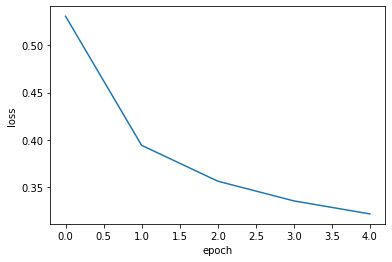

In [12]:
#에포크마다 손실과 정확도를 그려보자

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
#정확도 출력

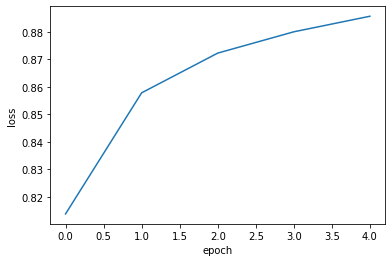

In [13]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

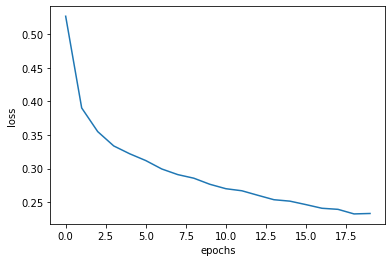

In [14]:
#에포크마다 손실이 감소하고 정확도가 향상하는 것을 확인할 수 있다. 
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20,verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

#에포크가 커질수록 손실이 감소한다 그렇다면 이전보다 더 나은 모델을 훈련한 것인가?

확률적 경사 하강법에서 과대/과소적합과 에포크 사이의 관계를 알아봤었음
인공신경망은 모두 일종의 경사하강법을 사용하므로 동일한 개념이 여기에도 적용된다.

에포크에 따른 과대적합과 과소적합을 파악하려면 훈련세트에 대한 점수 뿐만 아니라 검증세트에 대한 점수도 필요하다.


In [16]:
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [17]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


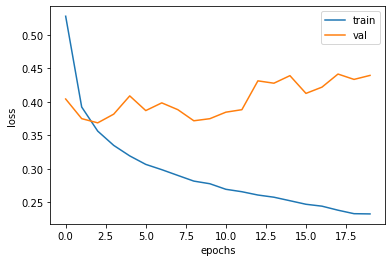

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

#검증손실이 다섯번쨰 에포크만에 다시 상승하기 시작함! 근데 훈련손실은 계속 감소하는 것으로보아 이때부터 과대적합이 시작되는 것이라 판단할 수 있따.

In [ ]:
#과대적합막기 위해 규제방식 대신에 특화된 규제방식을 적용해ㅗ겠ㅇ므
#일단 옵티마이저 하이퍼파라미터 조정하여 과대적합 완화시킬 수 있는지 알아보겠음


#RMSprop 옵티마이저는 많은 문제에서 잘 동작한다.
#만약 이 대신 다른 옵티마이저 테스트하려면 Adam이 좋은 선택이다.
#Adam은 적응적 학습률을 사용하기 떄문에 에포크가 진행되면서 학습률의 크기를 조정할 수 있다


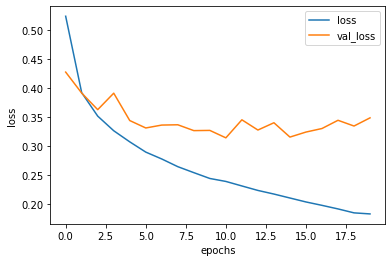

In [19]:
model=model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled, train_target,epochs=20, verbose=0,validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss','val_loss'])
plt.show()

#과대적합이 훨씬 줄었음을 확인할수 있음. 열번쨰 에포크까지 전반적인 감소추세가 이어지ㅣ고 있기 때문
#긍까 Adam 옵티마이저가 이 데이터셋에 잘 맞느다는 것

#더 나은 손실곡선을 얻으려면 학습률을 조정해서 다시 시도해보면된다.


드롭아웃은 훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(즉 뉴런의 출력을 0으로 만들어) 과대적합을 막는 것이다. 랜덤하게 드롭아웃되고 얼마나 많은 뉴런을 드롭할지는 우리가 정해야할 또 다른 하이퍼파라미터이다.

랜덤하게 어떤 뉴런이 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 주의를 기울여야한다. 

그리고 드롭아웃 적용해 훈련하는 것은 마치 두개의 신경망을 앙상블하는 것 처럼 상상하 수 있다. 
케라스에서는 드롭아웃을 케라스.레이어 페이지 아래 dropout 클래스로 제공한다. 어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만드는 것.
층 처럼 사용되지만 훈련되는 모델 파라미터는 없다.


In [20]:
model=model_fn(keras.layers.Dropout(0.3))
model.summary()

#30%정도를 드롭아웃


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


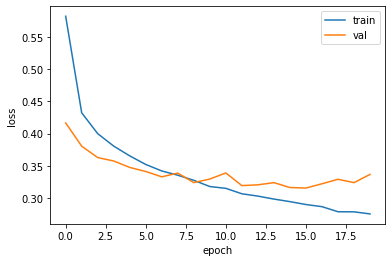

In [21]:
#훈련끝나고 평가나 예측할때는 드롭아웃 적용하지 않고 훈련된 모든 뉴런을 사용해야함
#텐서플로와 케라스는 모델을 평가와 예측에 사용할때는 자동으로 드롭아웃을 적용하지 않는다! 

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0,validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

#다소 과대적합되었음이 확인됨. 열번째 에포크 정도에서 검증 손실의 감소가 멈춰서

In [22]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=10, verbose=0,validation_data=(val_scaled,val_target))

In [23]:
#모델 저장해야함. 이때 훈련된 모델의 파라미터를 저장하는 간편한 save_weights()메서드를 제공한다.
#기본적으로 이 메서드는 텐서플로의 체크포인트 포맷으로 저장하지만 파이의 확장자가 .h5일 경우 HDF5 포맷으로 저장한다.
model.save_weights('model-weights.h5')

In [24]:
#모델 구조와 모델 파라미터를 함게 저장하는 save()메서드도 저ㅔ공한다. 
#이 메서드는 텐서플로의 SaveModel 포맷으로 저장하지만 파일의 확장자가 .h5일 경우 HDF5 포맷으로 저장한다.
model.save('model-whole.h5')

In [25]:
#두 파일이 잘 만들어졌는지 확인

!ls -al *.h5

-rw-r--r-- 1 root root 332480 Jul 27 01:00 model-weights.h5
-rw-r--r-- 1 root root 981736 Jul 27 01:01 model-whole.h5


In [ ]:
#첫번째는 훈련을 하지 않은 새로운 모델 만들고 model-weights.h5에서 훈련된 모델 파라미터를 읽어서 사용
#두 번째는 아예 model-whole.h5파일에서 새로운 모델 만들어 바로 사용
model=model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')
#이렇게 하려면 wave-weights로 저장했던 모델과 정확히 같은 구조를 가져야함


In [ ]:
#위의 모델의 검증 정확도를 확인해볼 것. 케라스에서 예측을 수행하는 predict()메서드는 사이킷런과 달리 샘플마다 10개의 클래스에 대한 확률을 반환한다.
#패션MNIST 데이터셋이 다중분류이기 때문. 이진분류면 양성클래스에 대한 확률하나만 반환한다.


In [26]:
#패션 MNIST 데이터셋에서 덜어낸 검증세트의 샘플 개수는 12,000개이기때문에 predict()메서드는 (12000,10)크기의 배열을 반환한다.
#따라서 10개 확률 중에서 가장 큰 값의 인덱슬르 골라 타깃 레이블과 비교하여 정확도를 계산해보겠따용

#모델 파라미터 읽고 evaluate9)를 사용하여 정확도를 출력할 수도 있따. 근데 evaluate()쓰려면 compile()을 실행해야함 ㅠㅠ 여기서는 새로운 데이터에 대해 정확도만 계산하기 위해 아래와 같은 방식을 진행한다.

import numpy as np
val_labels=np.argmax(model.predict(val_scaled), axis=-1) #배열의 가장 큰값의 인덱스를 반환한다. axis=-1은 배열의 마지막 차원을 따라 최댓값을 고ㅡㄴ다!
print(np.mean(val_labels==val_target))

0.8755


In [28]:
#모델 전체를 받아오기
model=keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

#load_model()은 모델 파라미터에다가 모델 구조와 옵티마이저 상태까지 모두 복원하므로 evaluate()를 사용할 수 있다.

375/375 [==============================] - 1s 1ms/step - loss: 0.3299 - accuracy: 0.8755


[0.3299475312232971, 0.8755000233650208]

위의 과정을 보면 일단 전체 에포크 동안 훈련하고 검증점수 높아지는 지점 확인해서 다시 모델 학습했음.
그렇다면 한 번에 끝낼 바업은??

콜백은 훈련과정 중간에 어떤 작업을 수행할 수 있게 하는 객체로 keras.callbacks 패키지 아래에 있는 클래스드이다.fit()메서드의 callbacks 매개변수에 리스트로 전달하여 사용한다. 

ModelCheckpoint 콜백은 기본적으로 최상의 검증점수를 만드는 모델을 저장한다.

In [29]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target),callbacks=[checkpoint_cb])

In [ ]:
#함수로 모델만들고 compile까지는 동일
#ModelCheckpoint크래스의 객체 checkpoint-cb를 만들고 fit)메서드의 callbacks 매개변수에 리스트로 감싸서 전달했다.

#모델이 훈련한 ㄷ후에 bes-model.h5에 최상의 검증점수를 낸 모델이 저장된다. 

In [30]:
model=keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3383 - accuracy: 0.8801


[0.3382802903652191, 0.8800833225250244]

In [34]:
#ModelCheckpoint 콜백이 가장 낮은 검증점수의 모델을 자동으로 저장해두었음
#근데!!! 여전히 20번의 에포크 동안 훈련을 하긴함.
#과대적합 전에 훈련을 미리중지하는 것을 조기종료라고 부른다.


#조기종료를 위한 EarlyStopping 콜백! 이 콜백의 patience 매개변수는 검증점수가 향상되지 않더라도 참을 에포크 횟수로 지정한다. ex. 2면 두번 연속 검즈엄수가 향상되지 않으면 훈련을 중지한다.
# 또한 restore_best_weights 매개변수를 True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌린다.

#earlystopping과 modelcheckpoint콜백을 함께 사용하면 가장 낮은 검증손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련을 중지할 수 있다. 또한 훈련을 중지한 다음 현재 모델의 파라미터를 최상의 파라미터로 되돌린다.

model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target),callbacks=[checkpoint_cb, early_stopping_cb])

In [36]:
print(early_stopping_cb.stopped_epoch)#몇번째 에포크에서 중단했니

10


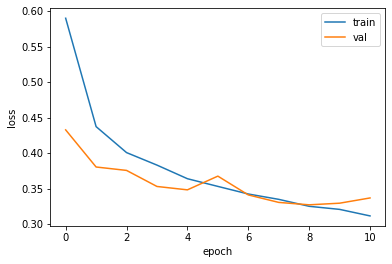

In [35]:
#훈련손실 검증손실 출력
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()


#조기종료를 사용하면 맨 처음에 epochs 횟수를 걍 크게 지정해도 괜찮겠네~

In [37]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.8821


[0.3274093270301819, 0.8820833563804626]